### shank detection plot

In [1]:
import os
import cv2
import json
import shutil
import random
import pickle
import numpy as np
import pandas as pd
from collections import defaultdict
from tqdm import tqdm
from pprint import pprint
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

In [2]:
def get_sequences(df):
    df = df.sort_values('collected_on')
    df['datetime'] = df.collected_on.apply(datetime.fromisoformat)
    sequence_dfs = []
    delta = timedelta(seconds=1.5)
    start = True
    i0, i = 0, 0
    while i < len(df):
        if start:
            t0 = df.iloc[i].datetime
            start = False
        else:
            t1 = df.iloc[i].datetime
            if t1 - t0 > delta or i == len(df) - 1:
                chunk_df = df.iloc[i0 : i if i < len(df) - 1 else len(df)]
                sequence_dfs.append(chunk_df)
                start = True
                i0 = i
            else:
                t0 = t1
        i += 1
    return sequence_dfs

In [3]:
output_csv = '/raid/li.yu/exps/driveable_terrain_model/v453_d6_percentnorm_lite12_4cls_0506/Jupiter_2022_Dust_Humans_Unfiltered_partiallabeled/output.csv'
master_df = pd.read_csv('/home/bluerivertech/li.yu/data/Jupiter_2022_Dust_Humans_Unfiltered_partiallabeled/master_annotations.csv')
df = pd.read_csv(output_csv)
df['image_id'] = df['id']
df = df.merge(master_df, on='image_id')
df.shape

(1365, 174)

In [4]:
df_seqs = get_sequences(df)
len(df_seqs)

8

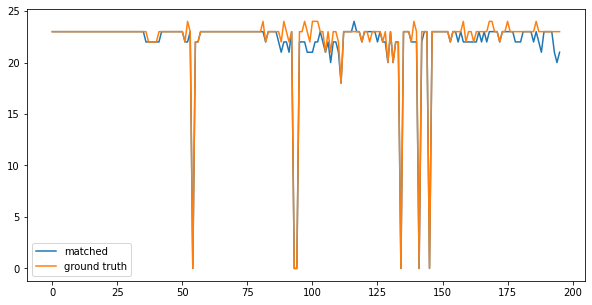

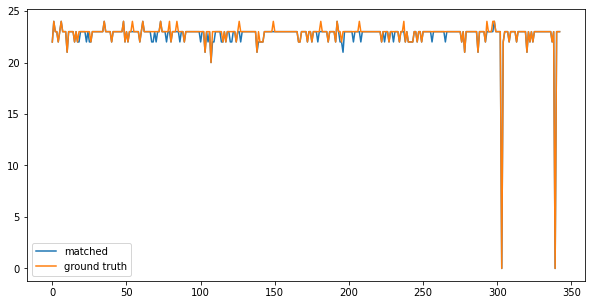

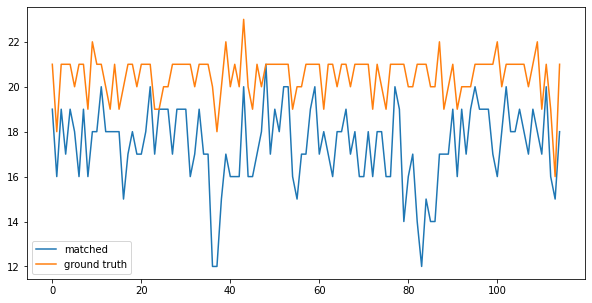

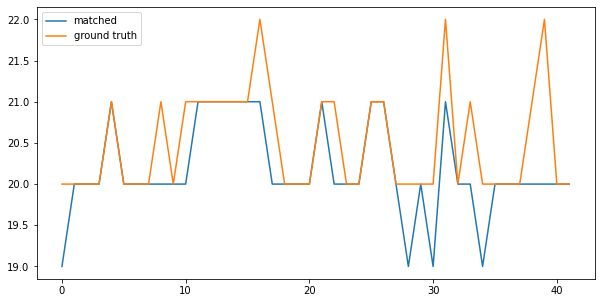

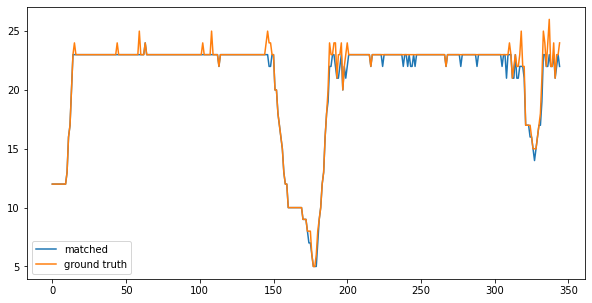

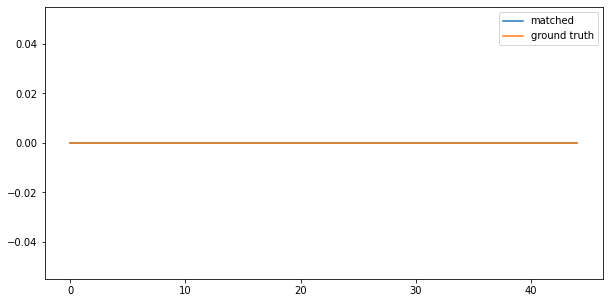

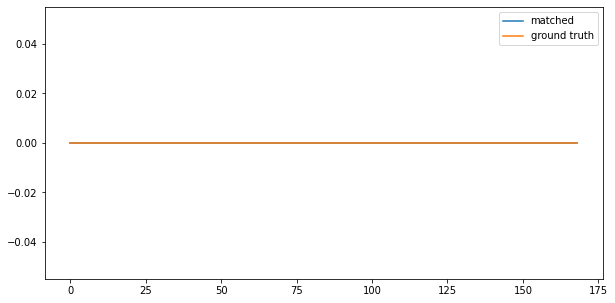

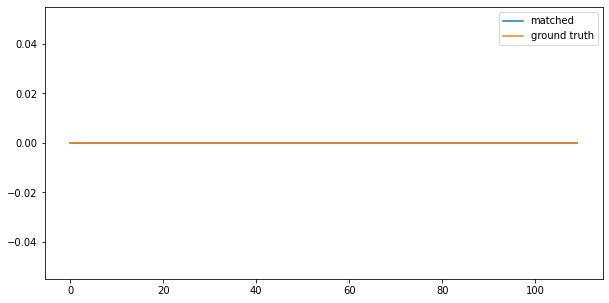

In [6]:
for df_seq in df_seqs:
    plt.figure(1, figsize=(10, 5))
#     plt.plot(range(df_seq.shape[0]), df_seq.detected_shanks.to_list(), label='detected')
    plt.plot(range(df_seq.shape[0]), df_seq.matched_shanks.to_list(), label='matched')
    plt.plot(range(df_seq.shape[0]), df_seq.gt_shanks.to_list(), label='ground truth')
    plt.legend()
    plt.show()